<a href="https://colab.research.google.com/github/snarayana27/SAP_AI/blob/main/Reference_Notebook_Facial_Emotion_Detection_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')







Mounted at /content/gdrive


## **Importing the Libraries**

In [4]:
import zipfile
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D,LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam,SGD, RMSprop






### **Let us load and unzip the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [9]:


path = "/content/Facial_emotion_images.zip"





In [10]:
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

**Observations and Insights:__Happy: The main distinguishing feature is the presence of a smile. Both males and females of various age groups are represented in the dataset. All images are in black and white. This diversity within the class is useful as it makes the model versatile and generalizable.Upward curve of the lips (smile) is visible. The eyes are also creased, and cheeks  raised. These features separate happy emotions from others.**

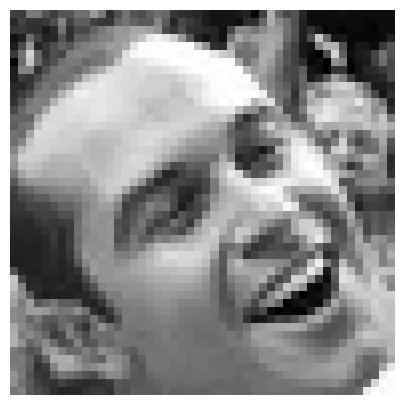

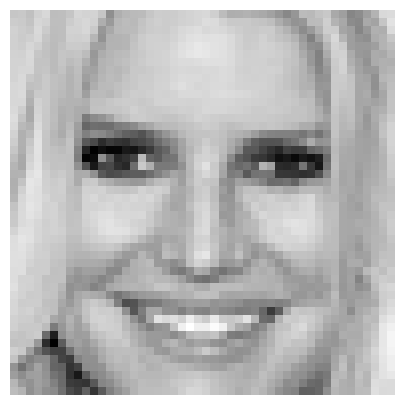

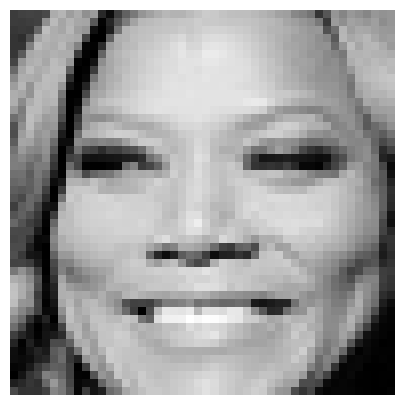

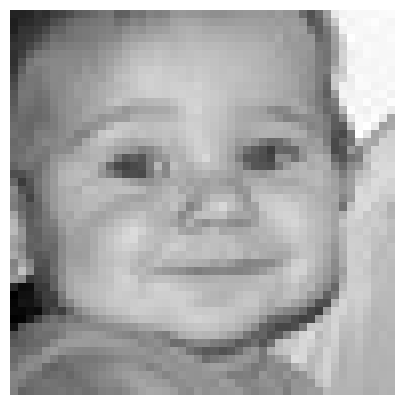

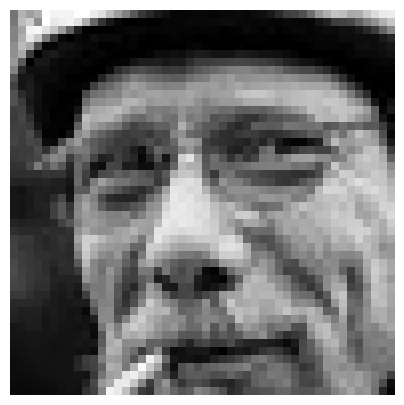

In [ ]:
def show_images(path, num_images=5):
    images = os.listdir(path)
    num_images = min(len(images), num_images)
    random_images = random.sample(images, num_images)

    for img_name in random_images:
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.figure(figsize=(5,5))
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.show()

# Use the function
show_images('/content/gdrive/My Drive/Facial_emotion_images/train/happy/')





### **Sad**

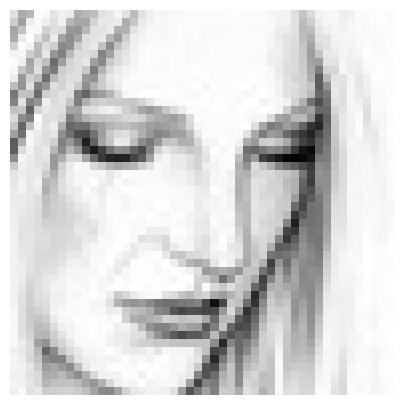

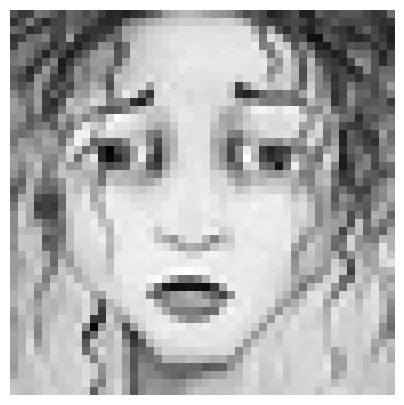

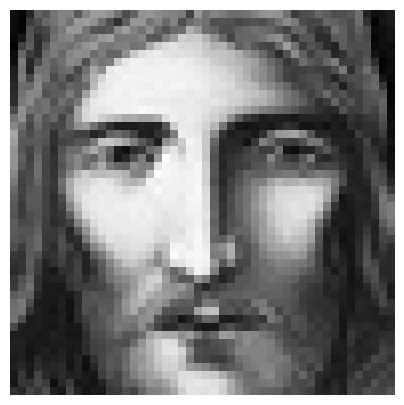

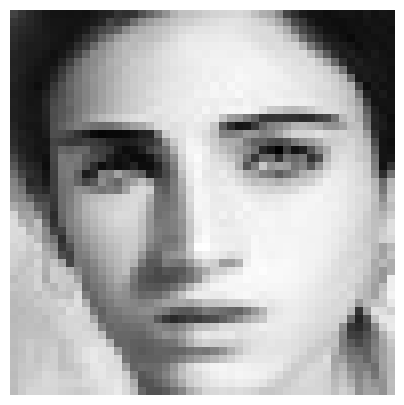

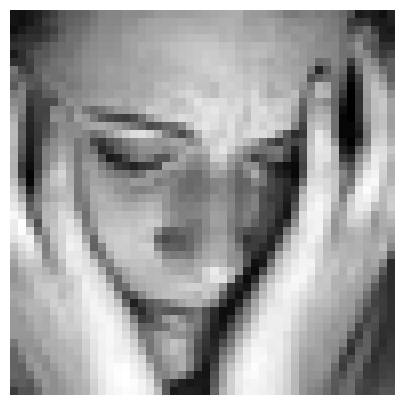

In [ ]:
show_images('/content/gdrive/My Drive/Facial_emotion_images/train/sad/')

**Observations and Insights:_Unlike 'happy' images, 'sad' images are characterized by a downward curve of the lips or no significant curve at all. Both males and females of various age groups are represented in the dataset, and all images are in black and white. The diversity within the class again aids in making the model versatile and generalizable. There's usually a lack of creases around the eyes and no raised cheeks, which separates 'sad' emotions from 'happy' ones. The eyebrows may also be pulled together and upwards, denoting distress._**

### **Neutral**

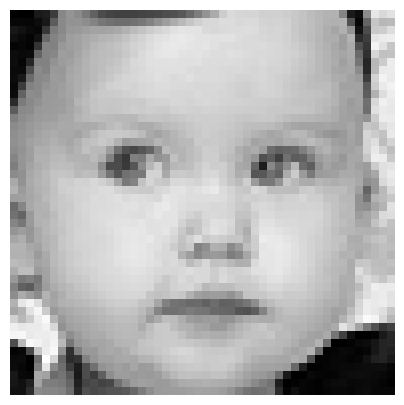

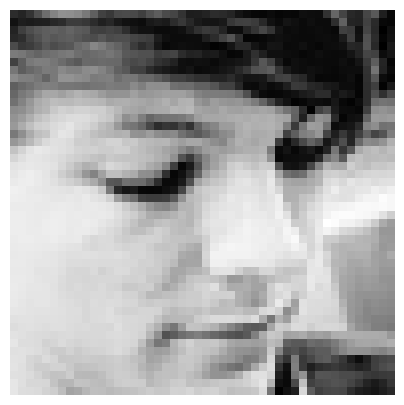

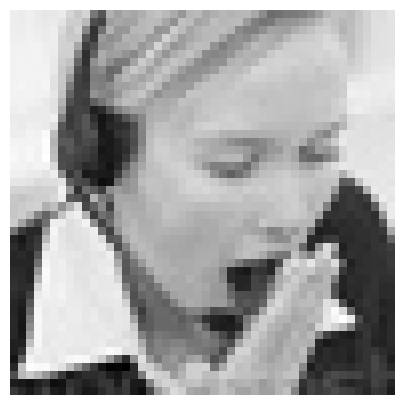

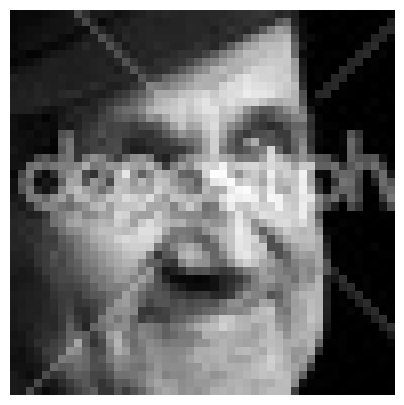

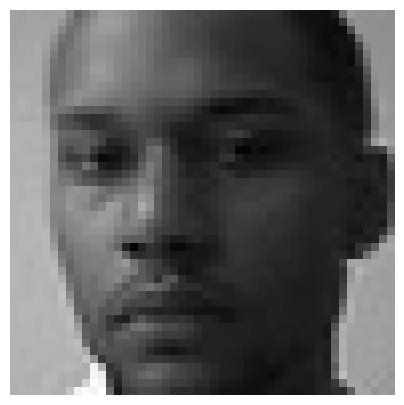

In [ ]:
show_images('/content/gdrive/My Drive/Facial_emotion_images/train/neutral/')

**Observations and Insights:_The 'neutral' images, like the others, are all in black and white, featuring individuals across different age groups and genders. Neutral expressions are unique in the sense that they exhibit a lack of notable emotional cues. In other words, the face appears relatively flat and motionless, without the prominent curves and creases characteristic of 'happy' or 'sad' expressions. The lips are typically in their natural position, neither curved up nor down, and the eyes and eyebrows are also relaxed. There may not be a lot of apparent movement or strain in the facial muscles. This lack of distinctive features makes 'neutral' a challenging class to predict accurately, as it can be easily confused with mild forms of other emotions._**

### **Surprised**

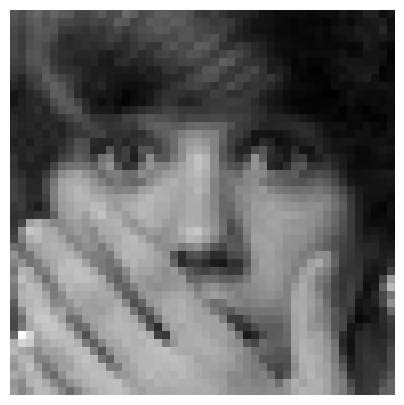

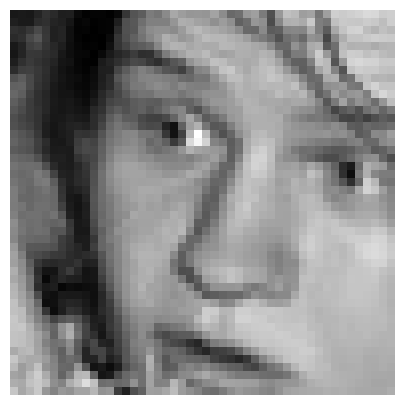

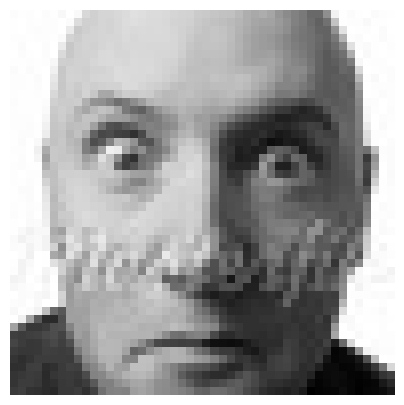

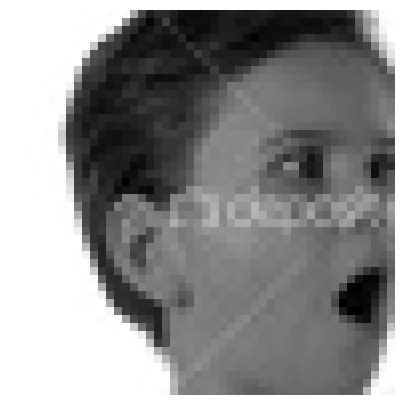

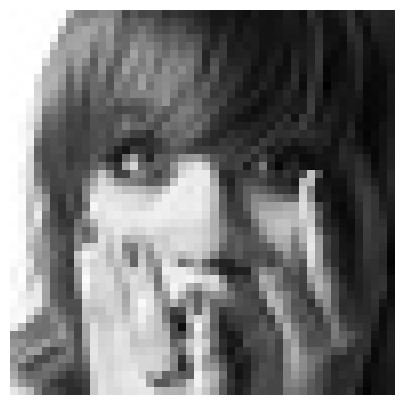

In [ ]:
show_images('/content/gdrive/My Drive/Facial_emotion_images/train/surprise/')

**Observations and Insights:_The 'surprised' images also consist of varied age groups and both genders, all in black and white. Surprise is typically characterized by wide-open eyes, raised eyebrows, and often an open mouth. The facial features tend to be exaggerated compared to other expressions, which can help in differentiating this class from others. Unlike 'happy' expressions where the smile lines are visible, 'surprised' expressions might not always exhibit a smile._**

## **Checking Distribution of Classes**

In [ ]:


# Directories containing the images
train_dir = '/content/gdrive/My Drive/Facial_emotion_images/train'
test_dir = '/content/gdrive/My Drive/Facial_emotion_images/test'
validation_dir = '/content/gdrive/My Drive/Facial_emotion_images/validation'

# List of emotion classes
classes = ['happy', 'sad', 'surprise', 'neutral']

# Function to count number of images in each directory
def count_images(base_dir, classes):
    for emotion in classes:
        dir = os.path.join(base_dir, emotion)
        num_images = len(os.listdir(dir))
        print(f'Number of {emotion} images: {num_images}')

# Count number of images in each class in training, test and validation datasets
print('Training dataset:')
count_images(train_dir, classes)

print('\nTest dataset:')
count_images(test_dir, classes)

print('\nValidation dataset:')
count_images(validation_dir, classes)


Training dataset:
Number of happy images: 3976
Number of sad images: 3982
Number of surprise images: 3173
Number of neutral images: 3978

Test dataset:
Number of happy images: 32
Number of sad images: 32
Number of surprise images: 32
Number of neutral images: 32

Validation dataset:
Number of happy images: 1825
Number of sad images: 1139
Number of surprise images: 797
Number of neutral images: 1216


**Observations and Insights:__The training dataset appears to have a balanced distribution between 'happy' and 'sad' classes. However, 'surprise' and 'neutral' classes have fewer images. This could potentially lead to bias in the model towards the 'happy' and 'sad' emotions as there are more examples for the model to learn from.

The test dataset is perfectly balanced, with an equal number of images in each emotion category. This is a good setup as it allows the model's performance to be tested evenly across all categories.

In the validation dataset, the 'happy' class has the highest number of images, while the 'surprise' class has the least. As with the training data, this imbalance could potentially lead to a bias in model performance.**

Think About It:

Are the classes equally distributed? No, there's an imbalance in the distribution of classes in the training and validation datasets.
If not, do you think the imbalance is too high? Yes, especially in the validation set, there's a notable imbalance between 'happy' and 'surprise' classes. Also, in the training set, 'surprise' and 'neutral' classes are underrepresented.
Will it be a problem as we progress? It might lead to a bias towards 'happy' and 'sad' classes in the training set and 'happy' class in the validation set as they are overrepresented.
Are there any Exploratory Data Analysis tasks that we can do here? Yes, we can investigate further by looking at the distribution of classes within gender, age groups etc. It would be beneficial to understand if there are specific biases in the dataset.
Would they provide any meaningful insights? Yes, further exploration of the dataset can provide more insights into potential biases and correlations, which could be helpful in improving the model's performance.
Next, it would be beneficial to address this imbalance. Techniques such as data augmentation (for underrepresented classes), under-sampling (for overrepresented classes), or synthetic data generation (like SMOTE) could be useful in this scenario. Please note, these techniques are most applicable for the training data. For the validation dataset, it is usually not recommended to manipulate the distribution as it should ideally reflect the real-world data distribution.







**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
# All images will be rescaled by 1./255
datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = datagen.flow_from_directory(
        '/content/gdrive/My Drive/Facial_emotion_images/train/',  # This is the source directory for training images
        target_size=(48, 48),  # All images will be resized to 150x150
        batch_size=32,
        class_mode='categorical',
        color_mode='rgb')

validation_generator = datagen.flow_from_directory(
        '/content/gdrive/My Drive/Facial_emotion_images/validation/',  # This is the source directory for validation images
        target_size=(48, 48),  # All images will be resized to 150x150
        batch_size=32,
        class_mode='categorical',
        color_mode='rgb')

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 


In the context of image recognition tasks, such as facial emotion detection, Convolutional Neural Networks (CNNs) are generally a more appropriate choice than Artificial Neural Networks (ANNs). Here are a few reasons why:

Handling of Spatial Data: CNNs are designed to handle spatial data, where the arrangement and order of the data is important. For images, the relative positions of pixels are crucial for understanding the content. CNNs, with their convolutional layers, are designed to interpret such spatial relationships. On the other hand, ANNs treat input data as a flat vector, which can lead to loss of spatial information.

Feature Learning: CNNs are designed to automatically and adaptively learn spatial hierarchies of features from the provided images. This means that the model can learn to identify important features from the images, like edges, shapes, or more complex structures depending on the depth of the network. ANNs generally lack this property.

Parameter Efficiency: CNNs have fewer parameters to learn than ANNs, thanks to their use of convolutional layers. This is because CNNs share weights across space, which is particularly suited to images that have the same statistical properties across the image. This makes them less computationally intensive and less prone to overfitting.

Translation Invariance: CNNs can identify an object or feature regardless of its location in the image due to the convolution operation and pooling layers. This property is essential for image recognition tasks, and it's something ANNs lack.

Better Performance on Image Data: Empirically, CNNs have shown to have superior performance on image-related tasks. This is likely due to their ability to capture local patterns and their robustness to distortions and transformations.

In summary, for tasks such as facial emotion detection, where the goal is to identify complex patterns in image data, CNNs are generally a more appropriate choice than ANNs.

* What are the advantages of CNNs over ANNs and are they applicable here?
The advantages of Convolutional Neural Networks (CNNs) over Artificial Neural Networks (ANNs) are especially significant in image-related tasks, which makes them highly applicable in this context of facial emotion detection. Here are some of the advantages:

Spatial feature learning: CNNs are able to learn spatial hierarchies of features, meaning they can understand the content of an image at different scales. For instance, at lower layers, CNNs can identify edges, while at higher layers, they can identify complex structures like faces or objects. ANNs lack this kind of spatial feature detection.

Parameter efficiency: In CNNs, weights are shared across space (spatial weight sharing), which reduces the number of parameters to be learned. This results in less computational cost and lower risk of overfitting. In contrast, ANNs have fully connected layers where each neuron is connected to every neuron in the next layer, which leads to a high number of parameters and makes the model more prone to overfitting.

Translation invariance: CNNs have translation invariance, meaning they can detect a feature regardless of where in the image that feature is located. This property is very useful for image recognition tasks since the location of a feature in an image should not affect whether the feature is recognized. ANNs lack this property.

Robustness to distortions and transformations: CNNs are more robust to distortions and transformations in images, thanks to pooling layers and data augmentation techniques that can be applied during training. This makes CNNs more adaptable to variations in real-world data.

Use of pre-trained models: CNNs have an advantage in terms of the availability of pre-trained models, such as VGG16, ResNet, etc., that have been trained on large datasets like ImageNet. These pre-trained models can be fine-tuned and used for transfer learning on new tasks with relatively small datasets. This approach is less common with ANNs.

Better performance on image data: Generally, CNNs outperform ANNs on image-related tasks. This is because CNNs are designed to deal with the 2D structure of images and are able to capture local patterns, like the shape of eyes or nose in the context of facial emotion detection, which would be difficult for ANNs to learn.

Given these advantages, using CNNs for facial emotion detection is a reasonable choice.

### **Creating the Base Neural Network**

In [ ]:


# Instantiate the model
model = Sequential()

# Add a 2D convolutional layer with 32 filters, a 3x3 kernel, 'relu' activation function, and the input shape
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))  # 1 for grayscale, 3 for rgb

# Add a max pooling layer to downsample the feature maps
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output from the previous layer
model.add(Flatten())

# Add a dense layer with 128 units and 'relu' activation function
model.add(Dense(128, activation='relu'))

# Add a dropout layer for regularization (optional)
model.add(Dropout(0.5))

# Add an output layer with 4 units (for the 4 emotion classes) and 'softmax' activation function
model.add(Dense(4, activation='softmax'))






### **Compiling and Training the Model**

In [ ]:
# Compile the model with an appropriate optimizer and loss function
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Print a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16928)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2166912   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                      

### **Evaluating the Model on the Test Set**

In [ ]:
# Load your test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical',
        color_mode='rgb' # or 'grayscale' depending on what you trained your model on
    )








Found 128 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # Index of the desired GPU device


In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3573710161330683256
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14328594432
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3834571508484028978
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
!cat /proc/meminfo

MemTotal:       13294264 kB
MemFree:         2051496 kB
MemAvailable:    9429500 kB
Buffers:          261248 kB
Cached:          7070324 kB
SwapCached:            0 kB
Active:          2269944 kB
Inactive:        8224304 kB
Active(anon):       1936 kB
Inactive(anon):  3177924 kB
Active(file):    2268008 kB
Inactive(file):  5046380 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1692 kB
Writeback:             0 kB
AnonPages:       3140560 kB
Mapped:          1203076 kB
Shmem:             17164 kB
KReclaimable:     389036 kB
Slab:             463760 kB
SReclaimable:     389036 kB
SUnreclaim:        74724 kB
KernelStack:        6544 kB
PageTables:        26616 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6647132 kB
Committed_AS:    4865808 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       79208 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
# Load your test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical',
        color_mode='rgb' # or 'grayscale' depending on what you trained your model on
    )

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)

print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')


Found 128 images belonging to 4 classes.


InternalError: ignored

**Observations and Insights:__**

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

### **Compiling and Training the Model**

### **Evaluating the Model on the Test Set**

**Observations and Insights:__**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

## **VGG16 Model**

### **Importing the VGG16 Architecture**

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the VGG16 Model**

### **Evaluating the VGG16 model**

**Think About It:**

- What do you infer from the general trend in the training performance? 
- Is the training accuracy consistently improving? 
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the Model**

### **Evaluating the ResNet Model**

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the Model**

### **Evaluating the EfficientnetNet Model**

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

### **Compiling and Training the Model**

### **Evaluating the Model on Test Set**

**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**

**Observations and Insights:__**

## **Conclusion:____________**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?